<a href="https://colab.research.google.com/github/andreYoo/Time-series-analysis-anomaly-detection/blob/main/%ED%95%AD%EB%A1%9C%ED%91%9C%EC%A7%80%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B2%B0%EC%B8%A1%EC%B9%98%EB%B3%B4%EA%B0%84_HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

import pandas as pd # 판다스 호출 
import numpy as np  # 넘파이 호출 
import torch 
import statsmodels.api as sm # statsmodels 호출 
import seaborn as sns # 그래프를 그리기위한 Seaborn 호출 
from statsmodels.tsa.seasonal import seasonal_decompose # 데이터 필터 라이러리 호출 
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataframe = pd.read_csv('./drive/MyDrive/study/tmp_TB_STATUS.csv')
raw_data = dataframe.values
dataframe.head()

,Unnamed: 0,MMAF_CODE,MMSI,COLCT_DT,REG_ANS,COMM_TYPE,LATITUDE,LONGITUDE,INSTALL_DT,LANTERN_STATUS,RACON_STATUS,BATTERY_STATUS,CHARGER_STATUS,SOLAR_STATUS,DATALOGGER_STATUS,SPARE_STATUS,MAIN_VOLT_STATUS,SUB_VOLT_STATUS,SOLAR_VOLT_STATUS,WIND_VOLT_STATUS,WAVE_VOLT_STATUS,CHARGER_VOLT_STATUS,BATTERY_VOLT_STATUS,SPARE_VOLT_STATUS,AIS_CURR_STATUS,LANTERN_CURR_STATUS,DATALOGGER_CURR_STATUS,SPARE_CURR_STATUS,WIND_SPEED_STATUS,WIND_DIRECT_STATUS,AIR_TEMPER_STATUS,HUMIDITY_STATUS,DEW_POINT_STATUS,AIR_PRESSURE_STATUS,HORIZON_VISIBL_STATUS,WATER_LEVEL_STATUS,CURRENT1_STATUS,CURRENT2_STATUS,CURRENT3_STATUS,WAVE_HEIGHT_STATUS,WAVE_DRC_STATUS,SWELL_HEIGHT_STATUS,SWELL_DRC_STATUS,WATER_TEMPER_STATUS,PRECIPI_TYPE_STATUS,SALINITY_STATUS,ICE_STATUS,HEAT_PROSTR_STATUS,HELIOGRAPH_STATUS,OXYGEN_STATUS,OXYGEN_SATUR_STATUS,PH_STATUS,CHLOROPHYLL_STATUS,MUDDINESS_STATUS,PRECIPI_STATUS,CHARGER_CURR_STATUS,DISCHARGER_CURR_STATUS,VTS_ID,BASESTATION_ID,REGIST_USER_NO,REGIST_DT,UPDT_USER_NO,UPDT_DT
0,0,103,994403901,1.998030e+13,NaN,NaN,33.797717,126.322500,NaN,0,0,1,0.0,1.0,0.0,NaN,13.4,NaN,2.0,NaN,NaN,NaN,14.7,0.0,0.26,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.87,NaN,NaN,NaN,NaN,NaN,NaN
1,1,104,994401597,2.014030e+13,NaN,NaN,35.066583,129.130850,NaN,0,2,1,0.0,1.0,0.0,NaN,10.5,NaN,0.0,NaN,NaN,NaN,10.2,0.0,0.16,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.59,NaN,NaN,NaN,NaN,NaN,NaN
2,2,107,994402986,2.014020e+13,NaN,NaN,34.703650,125.837100,NaN,0,0,1,0.0,1.0,0.0,NaN,12.8,NaN,8.0,NaN,NaN,NaN,14.1,0.0,0.22,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.03,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,3,107,994402986,2.014020e+13,NaN,NaN,34.703667,125.837117,NaN,0,0,1,0.0,1.0,0.0,NaN,12.8,NaN,0.0,NaN,NaN,NaN,14.1,0.0,0.22,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,4,107,994402986,2.014020e+13,NaN,NaN,34.703667,125.837117,NaN,0,0,1,0.0,1.0,0.0,NaN,12.8,NaN,0.0,NaN,NaN,NaN,14.1,0.0,0.22,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.02,0.00,NaN,NaN,NaN,NaN,NaN,NaN


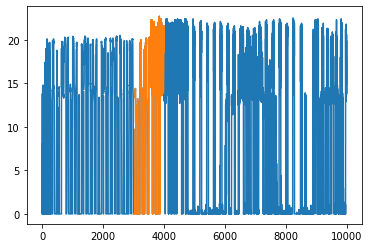

In [7]:
# The last element contains the labels

# The other data points are the electrocadriogram data
dataframe['SOLAR_VOLT_STATUS'].plot()
data = dataframe['SOLAR_VOLT_STATUS'][3000:4000]
data.plot()

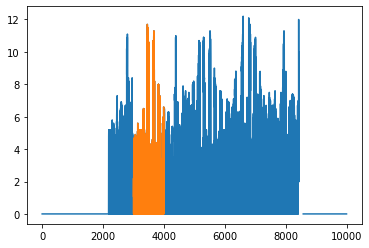

In [11]:
weather_dataframe = pd.read_csv('./drive/MyDrive/study/tmp_TB_WEATHER.csv')
raw_data = weather_dataframe.values
weather_dataframe.head()
# The last element contains the labels

# The other data points are the electrocadriogram data
weather_dataframe['WIND_SPEED'].plot()
wind_data = weather_dataframe['WIND_SPEED'][3000:4000]
wind_data.plot()


In [13]:
cases = pd.DataFrame(data).join(pd.DataFrame(wind_data),how="inner")
cases.head()

,SOLAR_VOLT_STATUS,WIND_SPEED
3000,0.0,1.1
3001,0.0,1.3
3002,0.0,0.0
3003,0.0,2.2
3004,0.0,1.4


In [14]:
cases.corr()

,SOLAR_VOLT_STATUS,WIND_SPEED
SOLAR_VOLT_STATUS,1.000000,0.050947
WIND_SPEED,0.050947,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


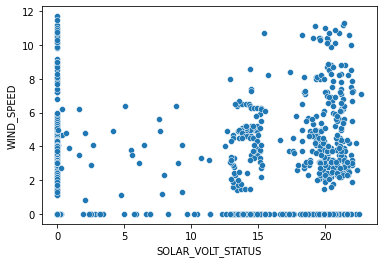

In [15]:
x = cases["SOLAR_VOLT_STATUS"]
y = cases["WIND_SPEED"]
sns.scatterplot(x,y)

In [16]:
!pip install hmmlearn

     |████████████████████████████████| 129 kB 5.3 MB/s 


In [29]:
ir = np.nan_to_num(np.array(cases['SOLAR_VOLT_STATUS']),copy=False)
dr = np.nan_to_num(np.array(cases['WIND_SPEED']),copy=False)
features = np.column_stack((ir,dr))

In [34]:
from hmmlearn.hmm import GaussianHMM
score_list = []
hmm = GaussianHMM(n_components=5)
hmm.fit(features)

GaussianHMM(n_components=5)

In [37]:
features

array([[ 0. ,  1.1],
       [ 0. ,  1.3],
       [ 0. ,  0. ],
       ...,
       [19. ,  5.6],
       [21.6,  0. ],
       [21.3,  5.4]])

In [38]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(cases,test_size=0.33,shuffle=False)
ir_train = np.nan_to_num(np.array(cases['SOLAR_VOLT_STATUS']),copy=False)
dr_train = np.nan_to_num(np.array(cases['WIND_SPEED']),copy=False)
train_features = np.column_stack((ir_train,dr_train))

ir_test = np.nan_to_num(np.array(cases['SOLAR_VOLT_STATUS']),copy=False)
dr_test =  np.nan_to_num(np.array(cases['WIND_SPEED']),copy=False)
test_features = np.column_stack((ir_test,dr_test))

In [40]:
hmm.decode(test_features)

(-858.8515300478716,
 array([3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3,
        0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4,
        4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 3,
        0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
        3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0,
        3, 3, 3, 0, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 3, 0, 3,
        0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
        0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
        0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
        1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
        1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4,
        1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 2, 3, 0, 3,
        3, 0, 3, 

In [45]:
tmp = hmm.predict_proba(test_features)